#### Reference: https://alexsm.com/homogeneous-transforms/

In [1]:
import numpy as np 

In [2]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

In [6]:
def generate_rotation_matrix_2d(theta):
    c = np.cos(theta)
    s = np.sin(theta)
    return np.array([[c, -s], [s, c]])


In [22]:
def create_homogeneous_transform_2d(t_x, t_y, theta):
    
    translation = np.array([t_x, t_y], dtype=float)
    rotation = generate_rotation_matrix_2d(theta)
    
    transform = np.eye(3, dtype=float)
    transform[:2, :2] = rotation
    transform[:2, 2] = translation
    
    return transform 


In [23]:
def apply_transform(transform, x):
    """
    x: (2, n_points), each column corresponds to a 2d vector
    """
    one_row = np.array([1.] * x.shape[1])
    x_h = np.vstack([x, one_row])
    
    x_t = np.dot(transform, x_h)
    
    return x_t[:2] / x_t[-1]    
    

In [25]:
corners = np.array([
    [0., -0.5],
    [2., 0.],
    [0., 0.5]
]).T 
corners 

array([[ 0. ,  2. ,  0. ],
       [-0.5,  0. ,  0.5]])

In [29]:
poses = np.array([
    [0., 0., 0.],          # no rotation or translation
    [-3.0, 0., 0.],        # move -3 units in the x-direction
    [1., 2., np.pi / 3],   # move to [1, 2] and rotate by pi/3 counter-clockwise
    [3., -1., -np.pi / 2], # move to [3, -1] and rotate by pi/2 clockwise
])

Text(0.5, 1.0, 'Homogeneous transformation')

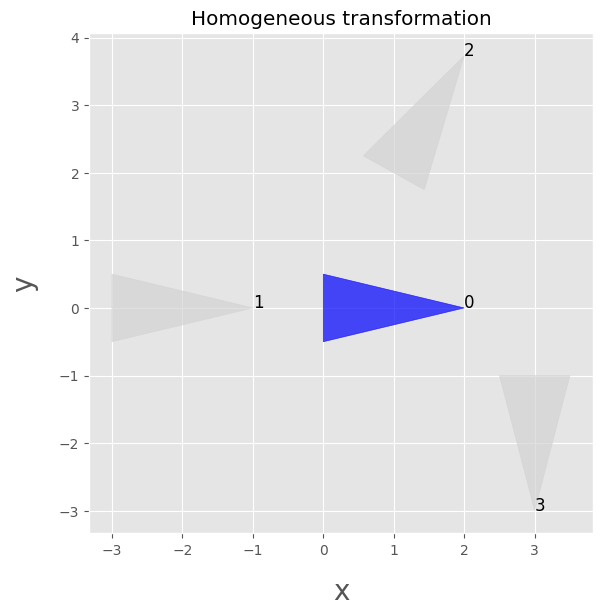

In [41]:
fig, ax = plt.subplots(1, figsize=(6.5, 6.5))

for i, pose in enumerate(poses):
    transform = create_homogeneous_transform_2d(*pose)
    transformed = apply_transform(transform, corners)
    
    color = 'blue' if i == 0 else 'lightgray'
    ax.fill(transformed[0, :], transformed[1, :], color=color, alpha=0.7)
    
    text_coord = transformed[:, 1]
    ax.text(text_coord[0], text_coord[1], i, fontsize='large')
    
ax.set_xlabel("x", fontsize=20, labelpad=15)
ax.set_ylabel("y", fontsize=20, labelpad=15)

ax.set_title("Homogeneous transformation")